- 说明
    - Qt的库、头文件比较多，离开Qt Creator或者qmake工具编译链接Qt程序，非常麻烦。
    - 个人喜欢VSCode，所以在VSCode下手工搭建Qt的开发环境；

# 前置条件

1. 环境：
    - Mac OS X 10.14.6

2. Qt版本
    - 5.12.1

3. Qt的安装
    - 是有那个官方提供的dmg文件安装；
    - 安装的问题：
        - 头文件与库都安装在指定的目录下，头没有拷贝到系统的`/usr/include`或者`/usr/local/include`下，库文件也没有拷贝到`/usr/lib`与`/usr/local/lib`目录下
        - Qt自带的工具qmake，uic等工具与没有拷贝到系统指定的PATH环境变量中。

# 头文件的处理

## 问题

- Mac OS X安装Qt后的头文件有两个问题
   1.  Qt的头文件采用C++无.h风格，C.h风格，头文件的引用关系比较混乱（Qt自己管理是非常清晰的）；
       - 大量使用`QtWidgets/qapplication.h`，但实际安装的framework目录下，没有`QWidgets`目录；
   2. 其中qconfig.h文件使用风格是`QtCore/qconfig.h`，实际上QtCore这个目录下没有qconfig.h头文件；

## 解决办法

1. 头文件目录的问题
    - 使用安装目录下源代码目录中的头文件
        - 头文件是编译时使用，主要用来检测类型、函数、类的定义；与链接无关，只要是正确的，使用哪个无所谓。
        - 下面是安装目录下的源代码目录结构：

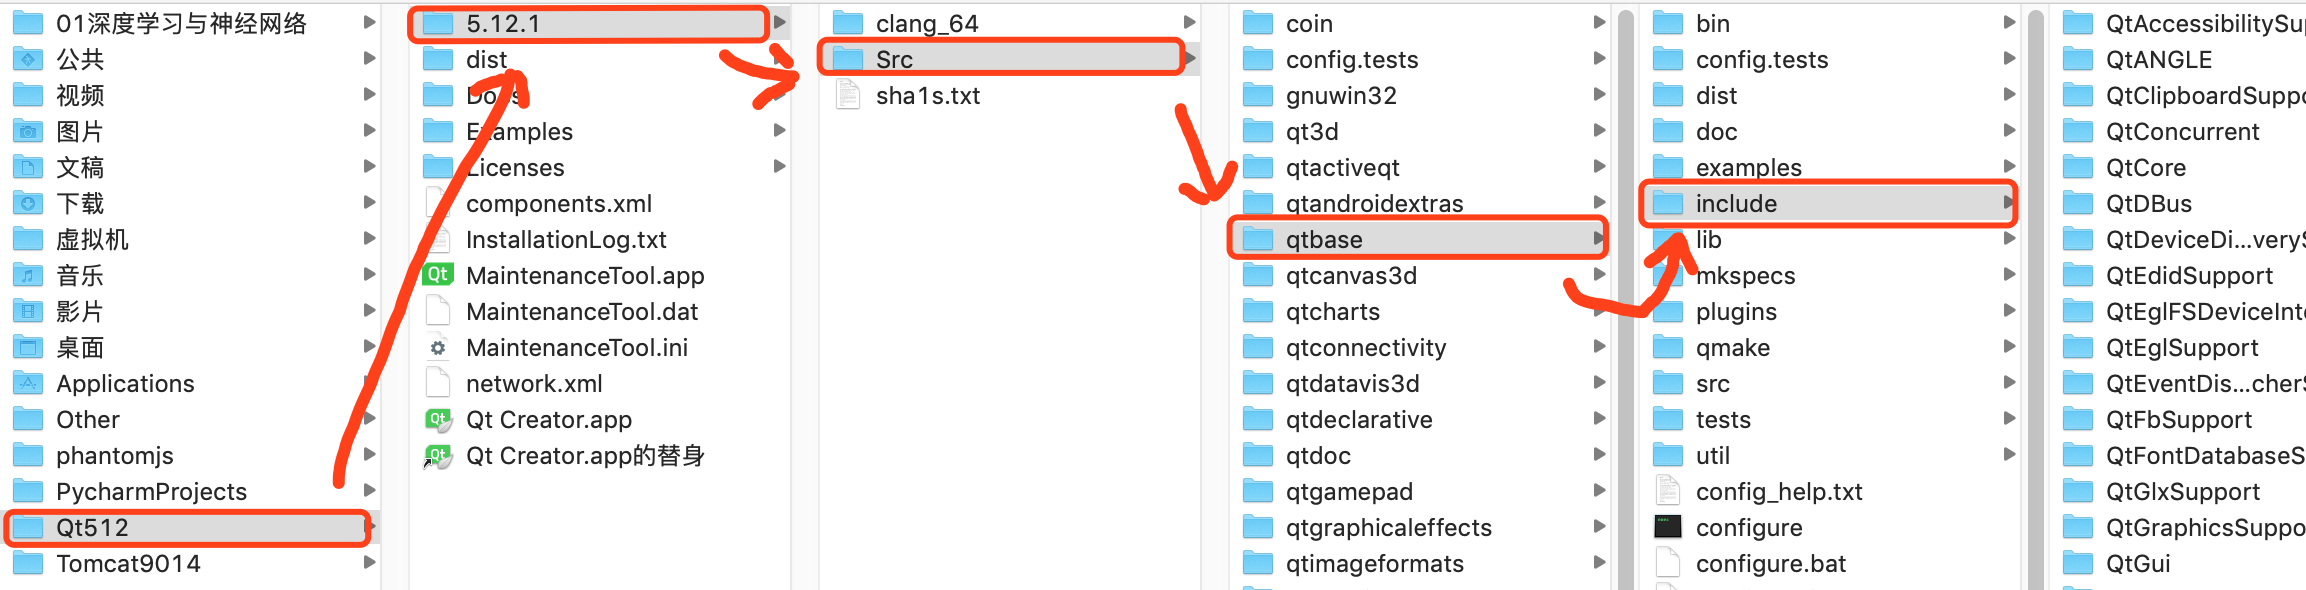

2. 在VSCode下的头文件配置
    - 需要使用的就慢慢添加！

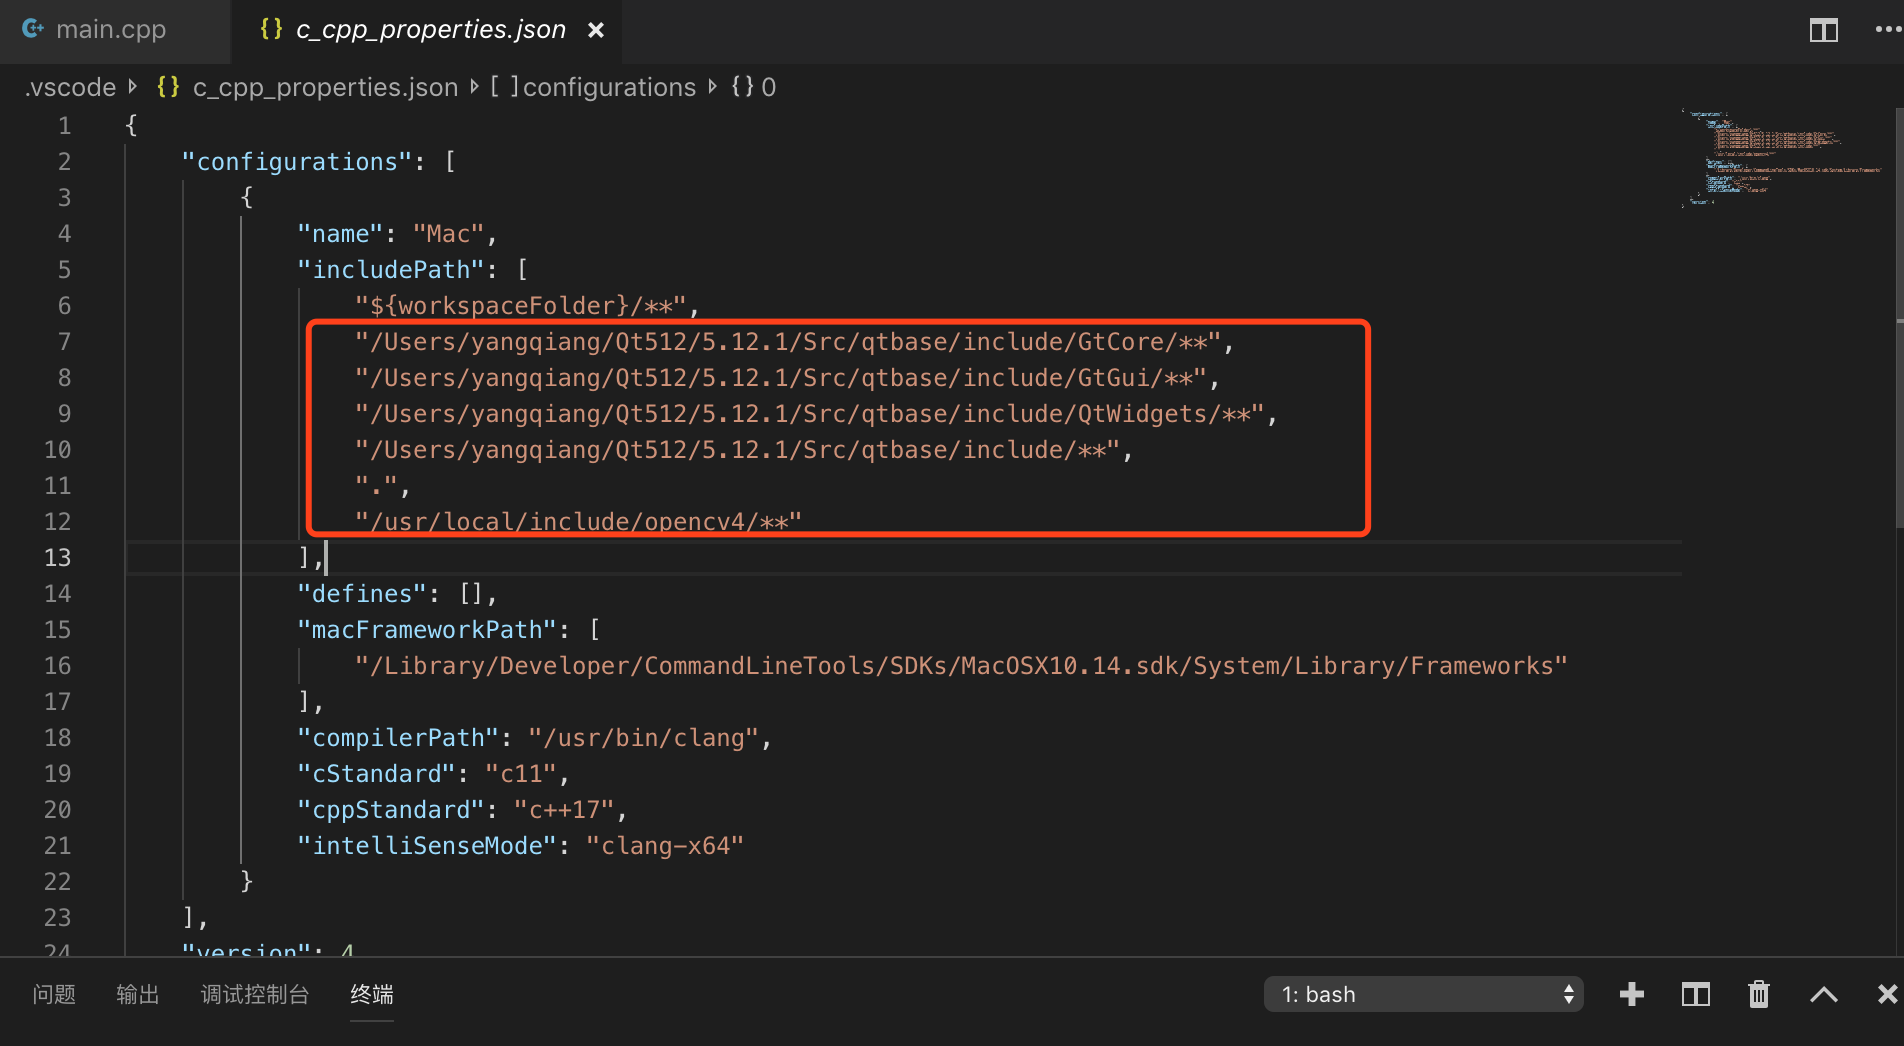

3. 在编译命令行中头文件配置
    - 这个太多，命令行非常长。
    - 使用-I（大写的i）选项参数指定多个头文件所在目录。

```bash
    g++ -omain main.cpp  
        -std=c++11 
        -I/Users/yangqiang/Qt512/5.12.1/Src/qtbase/include 
        -I/Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtCore 
        -I/Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/GtGui 
        -I/Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtWidgets 
        -F/Users/yangqiang/Qt512/5.12.1/clang_64/lib 
        -framework QtCore  
        -framework QtGui  
        -framework QtWidgets  
        -Wl,-rpath,/Users/yangqiang/Qt512/5.12.1/clang_64/lib
```

4. QtCore目录下没有qconfig.h文件的问题解决，有两个解决方法：
    1. 从其他地方拷贝一个过去
    2. 在Src在重新编译一次（qconfig.h不是Qt的一部分，而是编译的时候动态产生的环境参数文件）【提示：不需要安装就有】
        - 首先执行：`./configure`命令产生配置文件；
        - 然后执行：`make`命令编译链接；【提示：Qt编译安装时间long long ago！】
        - 最后，需要可以执行：`make install`命令安装；
        
   - 我采用重新编译的方法。

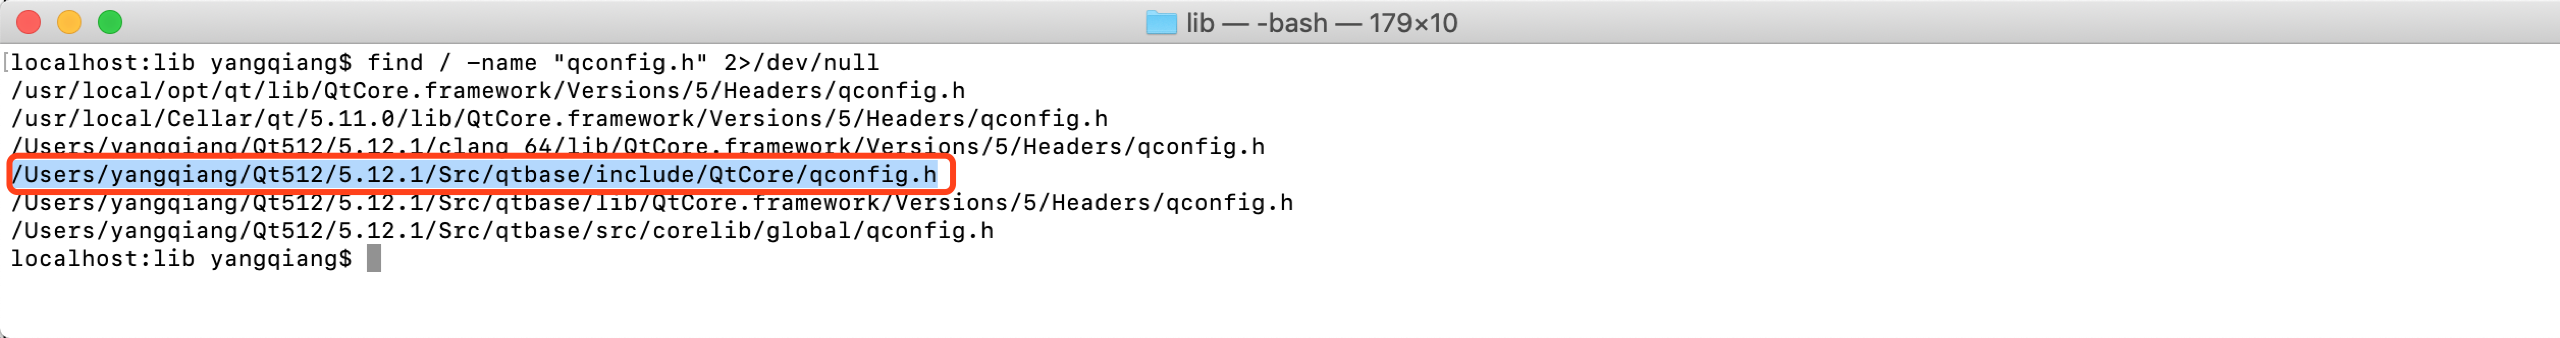

# 动态库的处理

## 问题

- 动态库有两个问题
    1. 动态库的路径问题，因为Mac OS采用的framework格式，所以clang编译器中使用的方式不同；
    2. 执行的时候，可能找不到动态库；

## 解决办法

1. 动态库查找问题
    1. 使用-L选项参数指定动态库的路径；
    2. 对framework使用-F选项参数指定路径；

2. framework的指定问题
    1. 使用-framework选项参数指定；

- 通过上面的步骤，可以编译链接成功，但是存在一个找不到动态库的问题：
    - 因为Qt的库安装的时候，没有拷贝到系统库目录；
    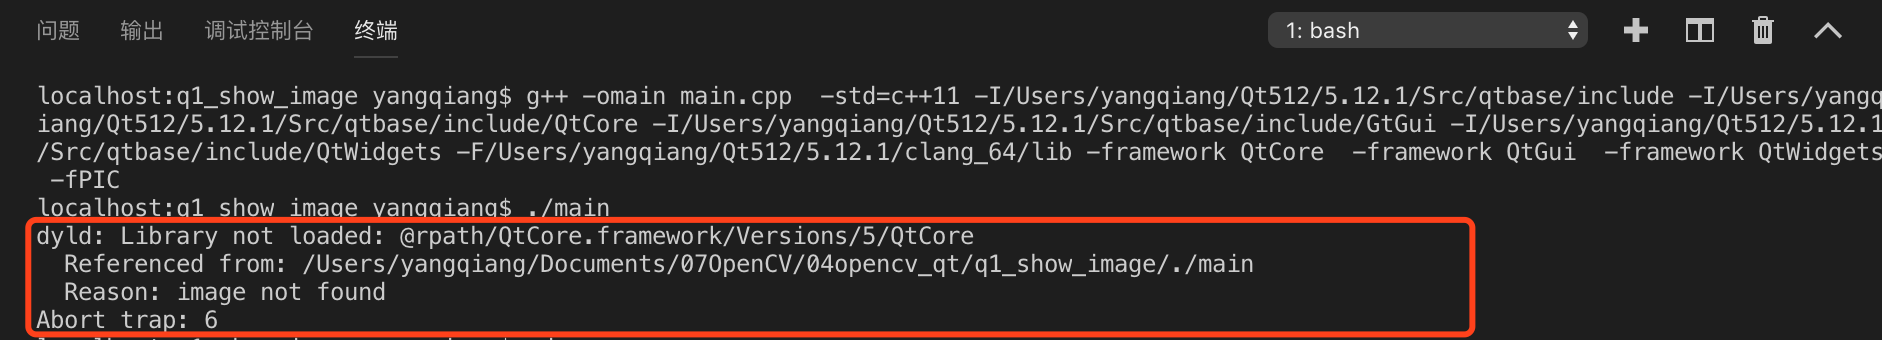

3. 库找不到问题的解决：
    - 在编译的时候，直接指定动态库位置（可以指定当前路径相对的某个目录下）
    - clang是编译器，连接器是ld（自动调用，其中手工调用也非常麻烦，包含系统的一些目标文件关联），可以在clang调用的时候传递参数给ld
        - `-Wl`选项参数就是用来传递链接参数给ld的。

- clang的`-Wl`参数说明
    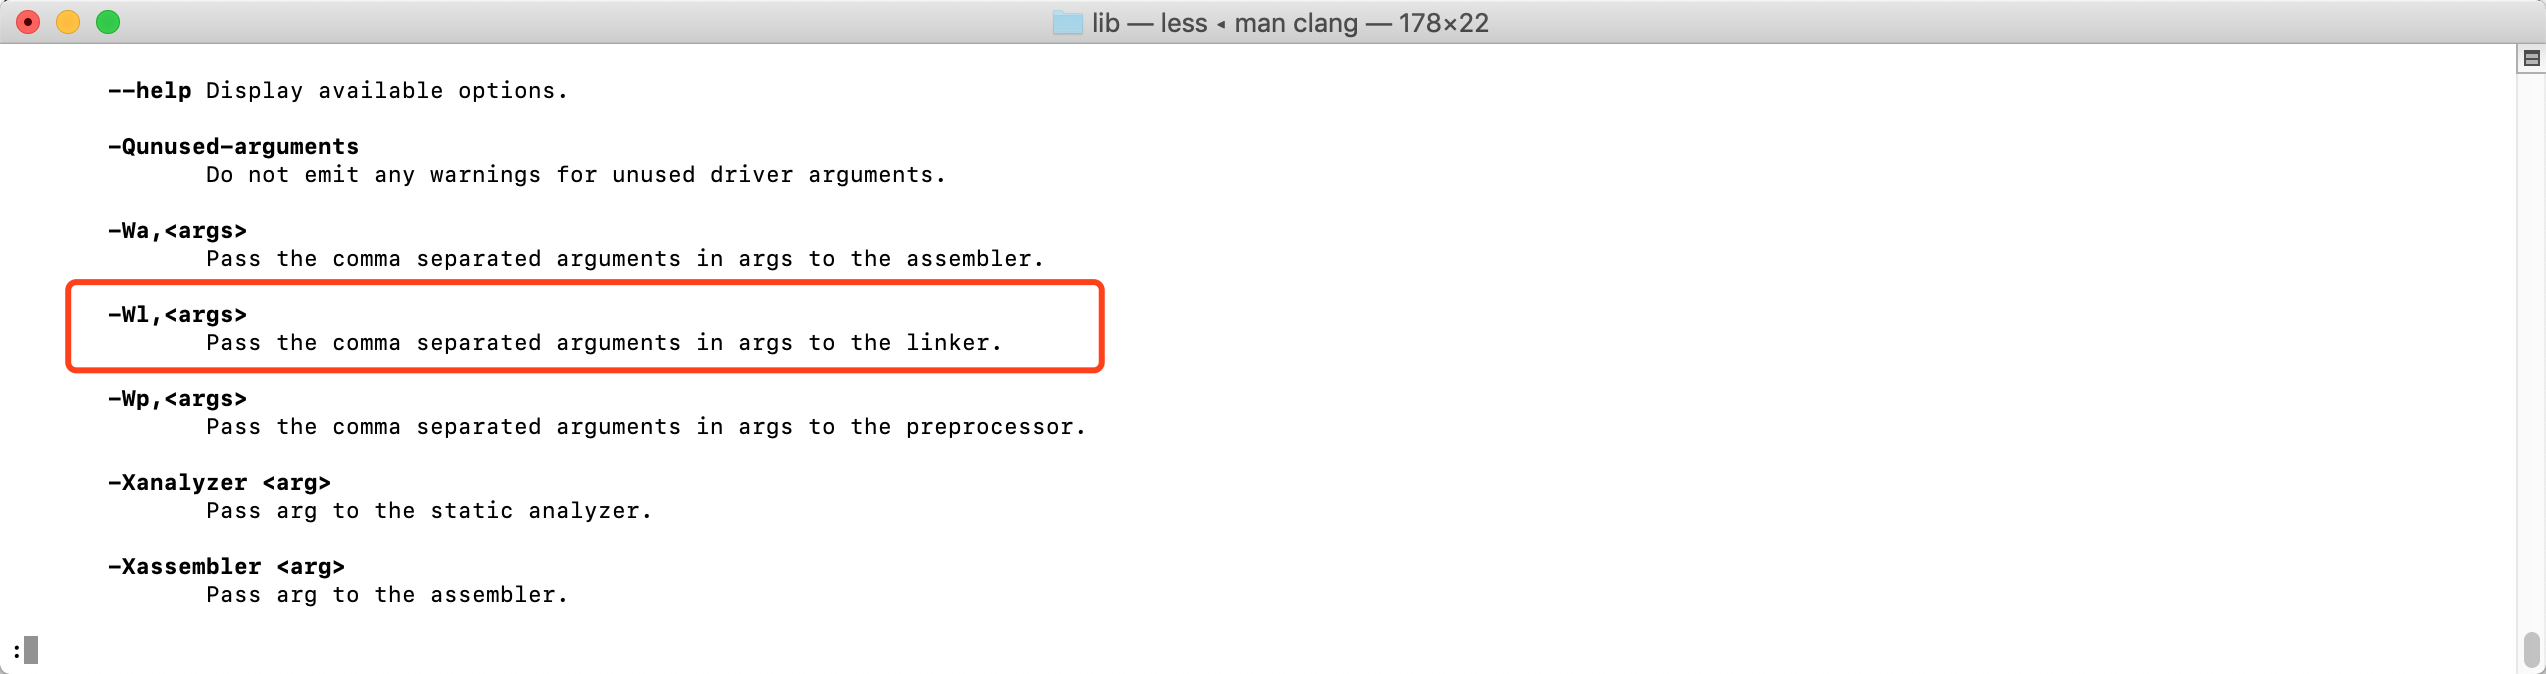

- ld的动态库位置指定参数说明
    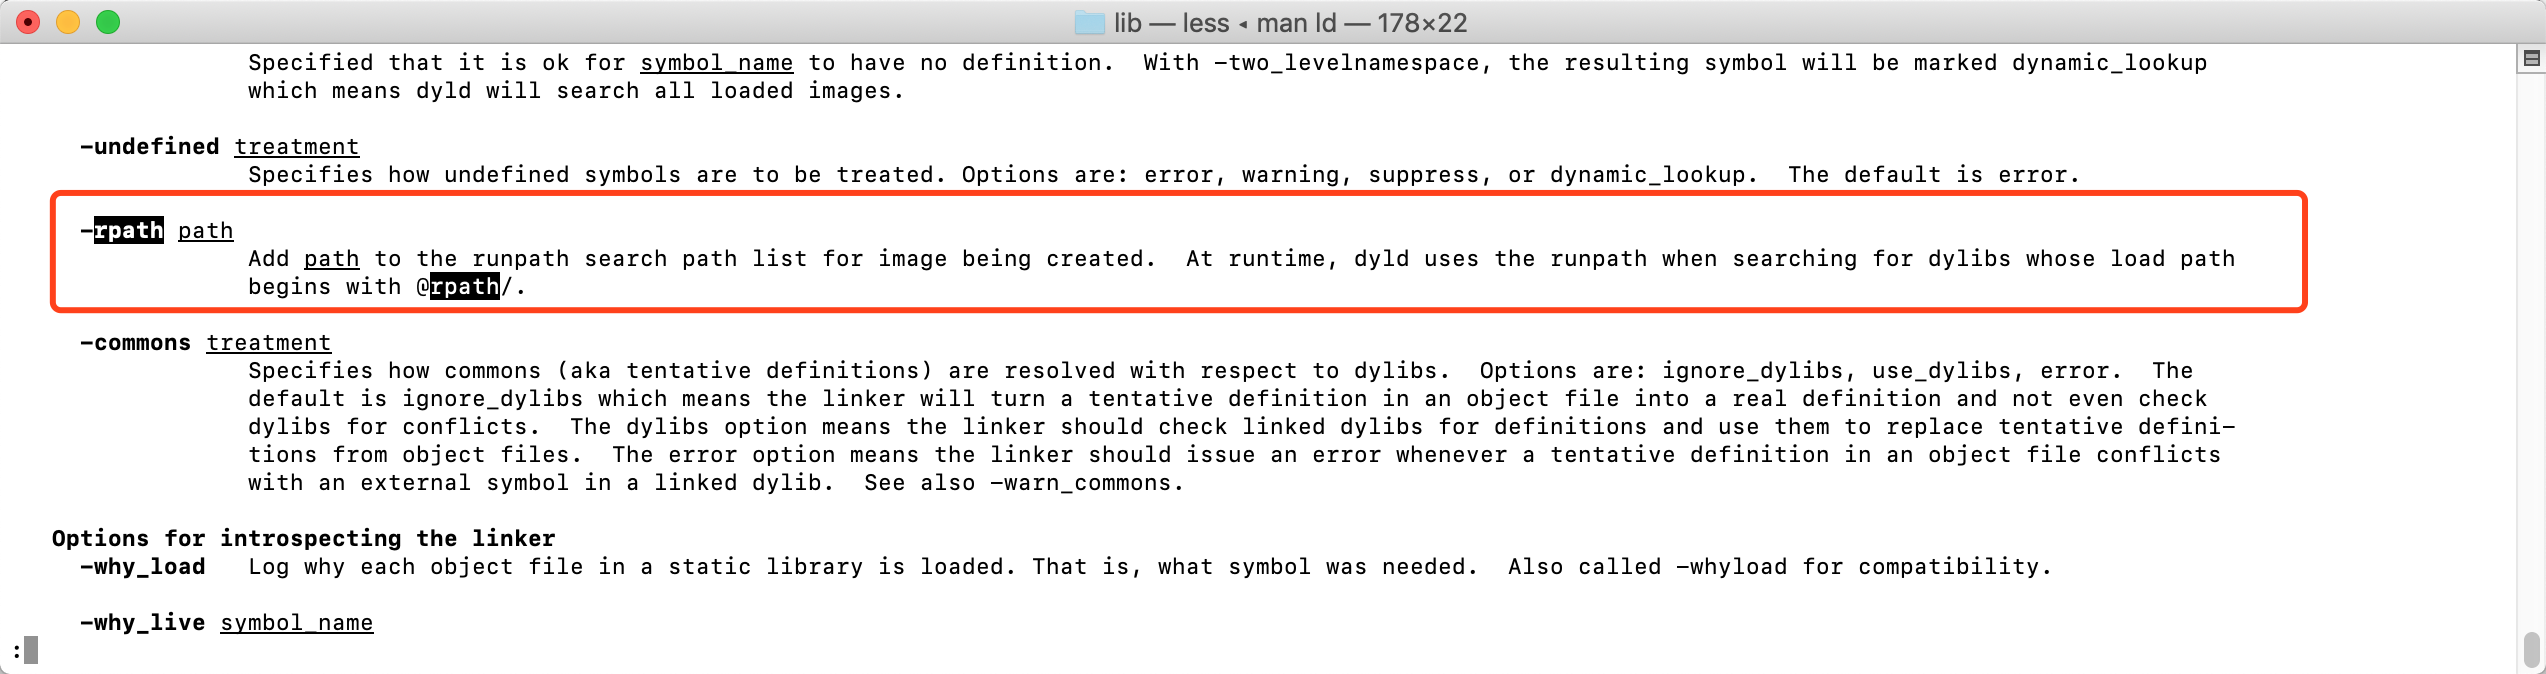

- 最终的编译指令为：

```bash
    g++ -omain main.cpp  
    -std=c++11 
    -I/Users/yangqiang/Qt512/5.12.1/Src/qtbase/include 
    -I/Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtCore 
    -I/Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/GtGui 
    -I/Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtWidgets 
    -F/Users/yangqiang/Qt512/5.12.1/clang_64/lib 
    -framework QtCore  
    -framework QtGui  
    -framework QtWidgets  
    -Wl,-rpath,/Users/yangqiang/Qt512/5.12.1/clang_64/lib
```

# Qt工具环境的处理

- 这个问题解决直接使用PATH环境变量设置即可
    1. 在系统与用户配置文件配置`profile`与`.bash_profile`
    2. 使用`export PATH=${PATH}:/Users/yangqiang/Qt512/5.12.1/clang_64/bin:.`

# 一个例子

## 代码

```C++
#include <QApplication>
#include <QDialog>
#include <iostream>

int main(int argc, char* argv[]) {
    QApplication app(argc, argv);
    QDialog  dlg;
    dlg.setWindowTitle("Qt程序");
    dlg.setGeometry(100,100,400,300);
    dlg.show();
    return app.exec();
}

// 编译命令：g++ -omain main.cpp  -std=c++11 -I/Users/yangqiang/Qt512/5.12.1/Src/qtbase/include -I/Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtCore -I/Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/GtGui -I/Users/yangqiang/Qt512/5.12.1/Src/qtbase/include/QtWidgets -F/Users/yangqiang/Qt512/5.12.1/clang_64/lib -framework QtCore  -framework QtGui  -framework QtWidgets  -Wl,-rpath,/Users/yangqiang/Qt512/5.12.1/clang_64/lib
// 环境命令：export PATH=${PATH}:/Users/yangqiang/Qt512/5.12.1/clang_64/bin:.

```

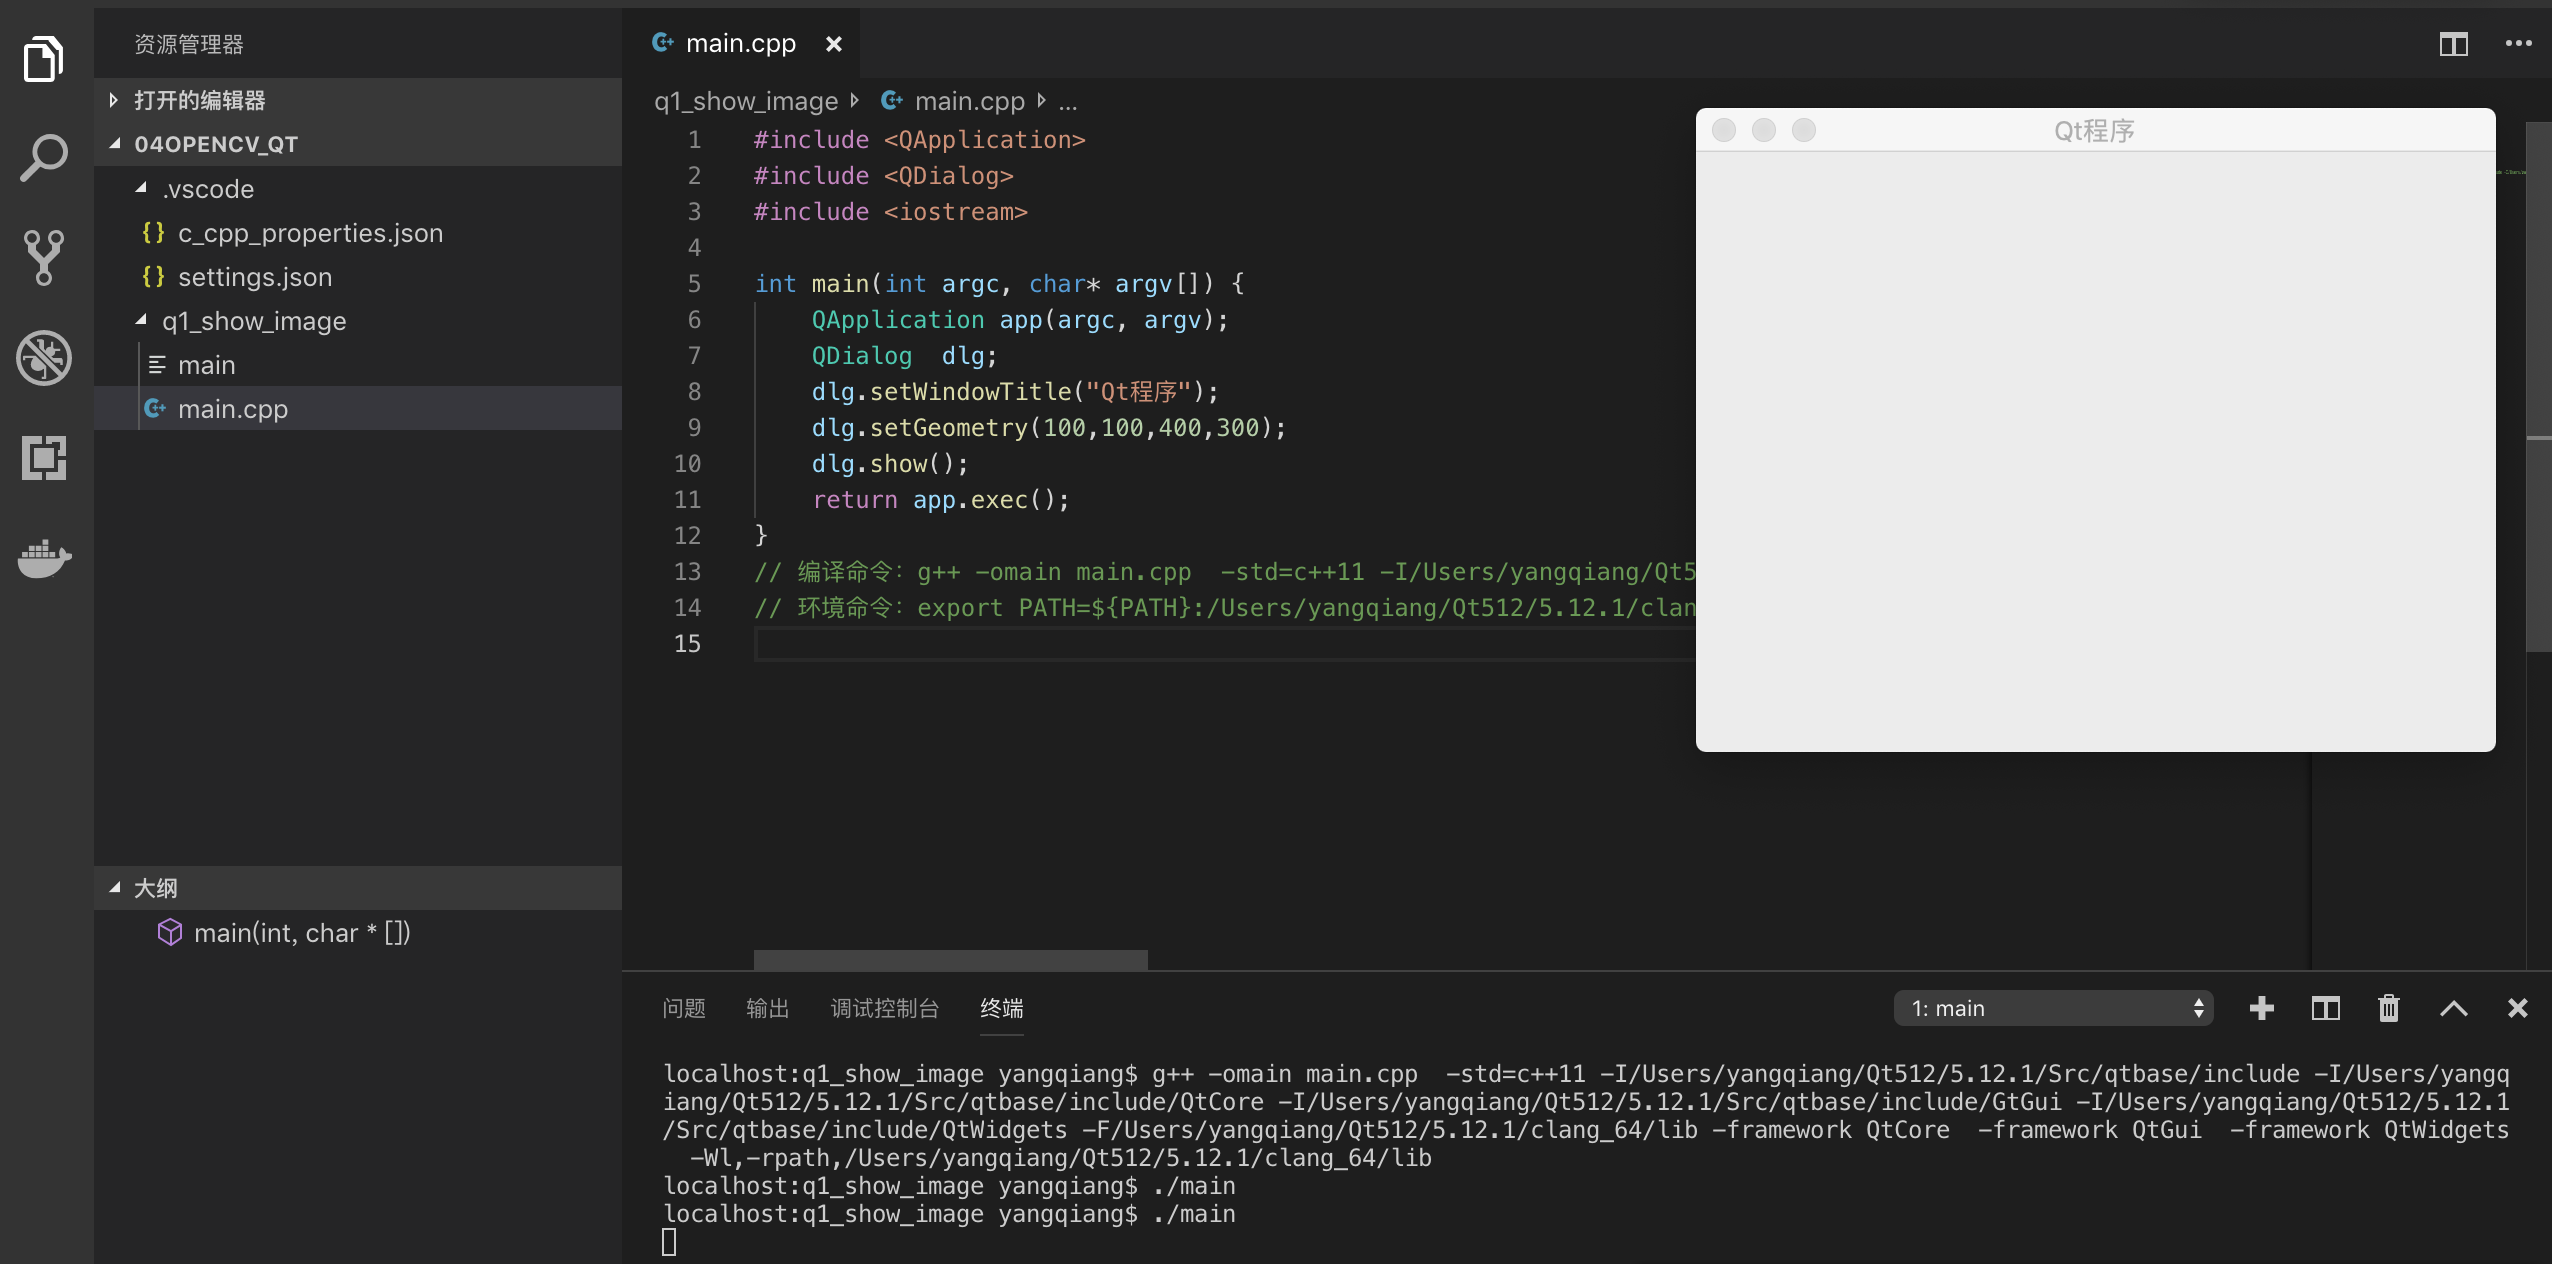

----

# 附录

## Qt编译过程
- 命令：`make`

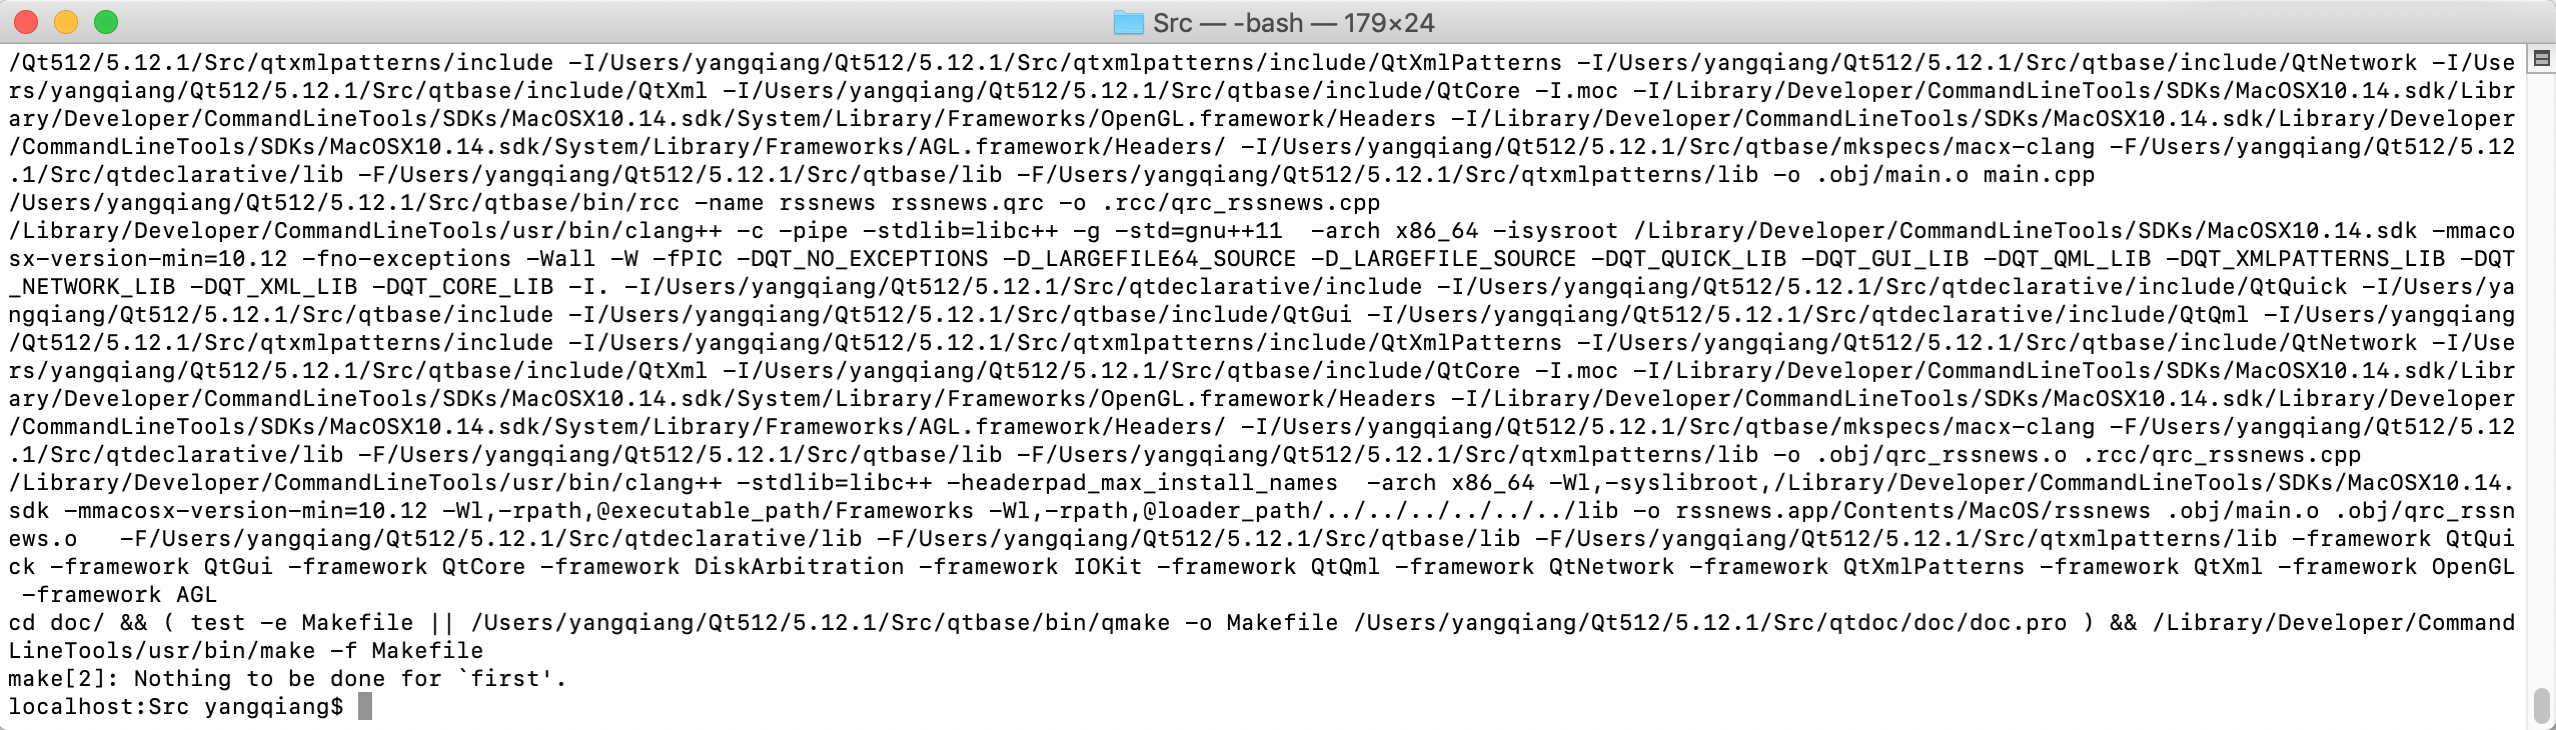

## 安装过程
- 注意：需要权限
    - 需要切换到root用户
- 命令：`make install`

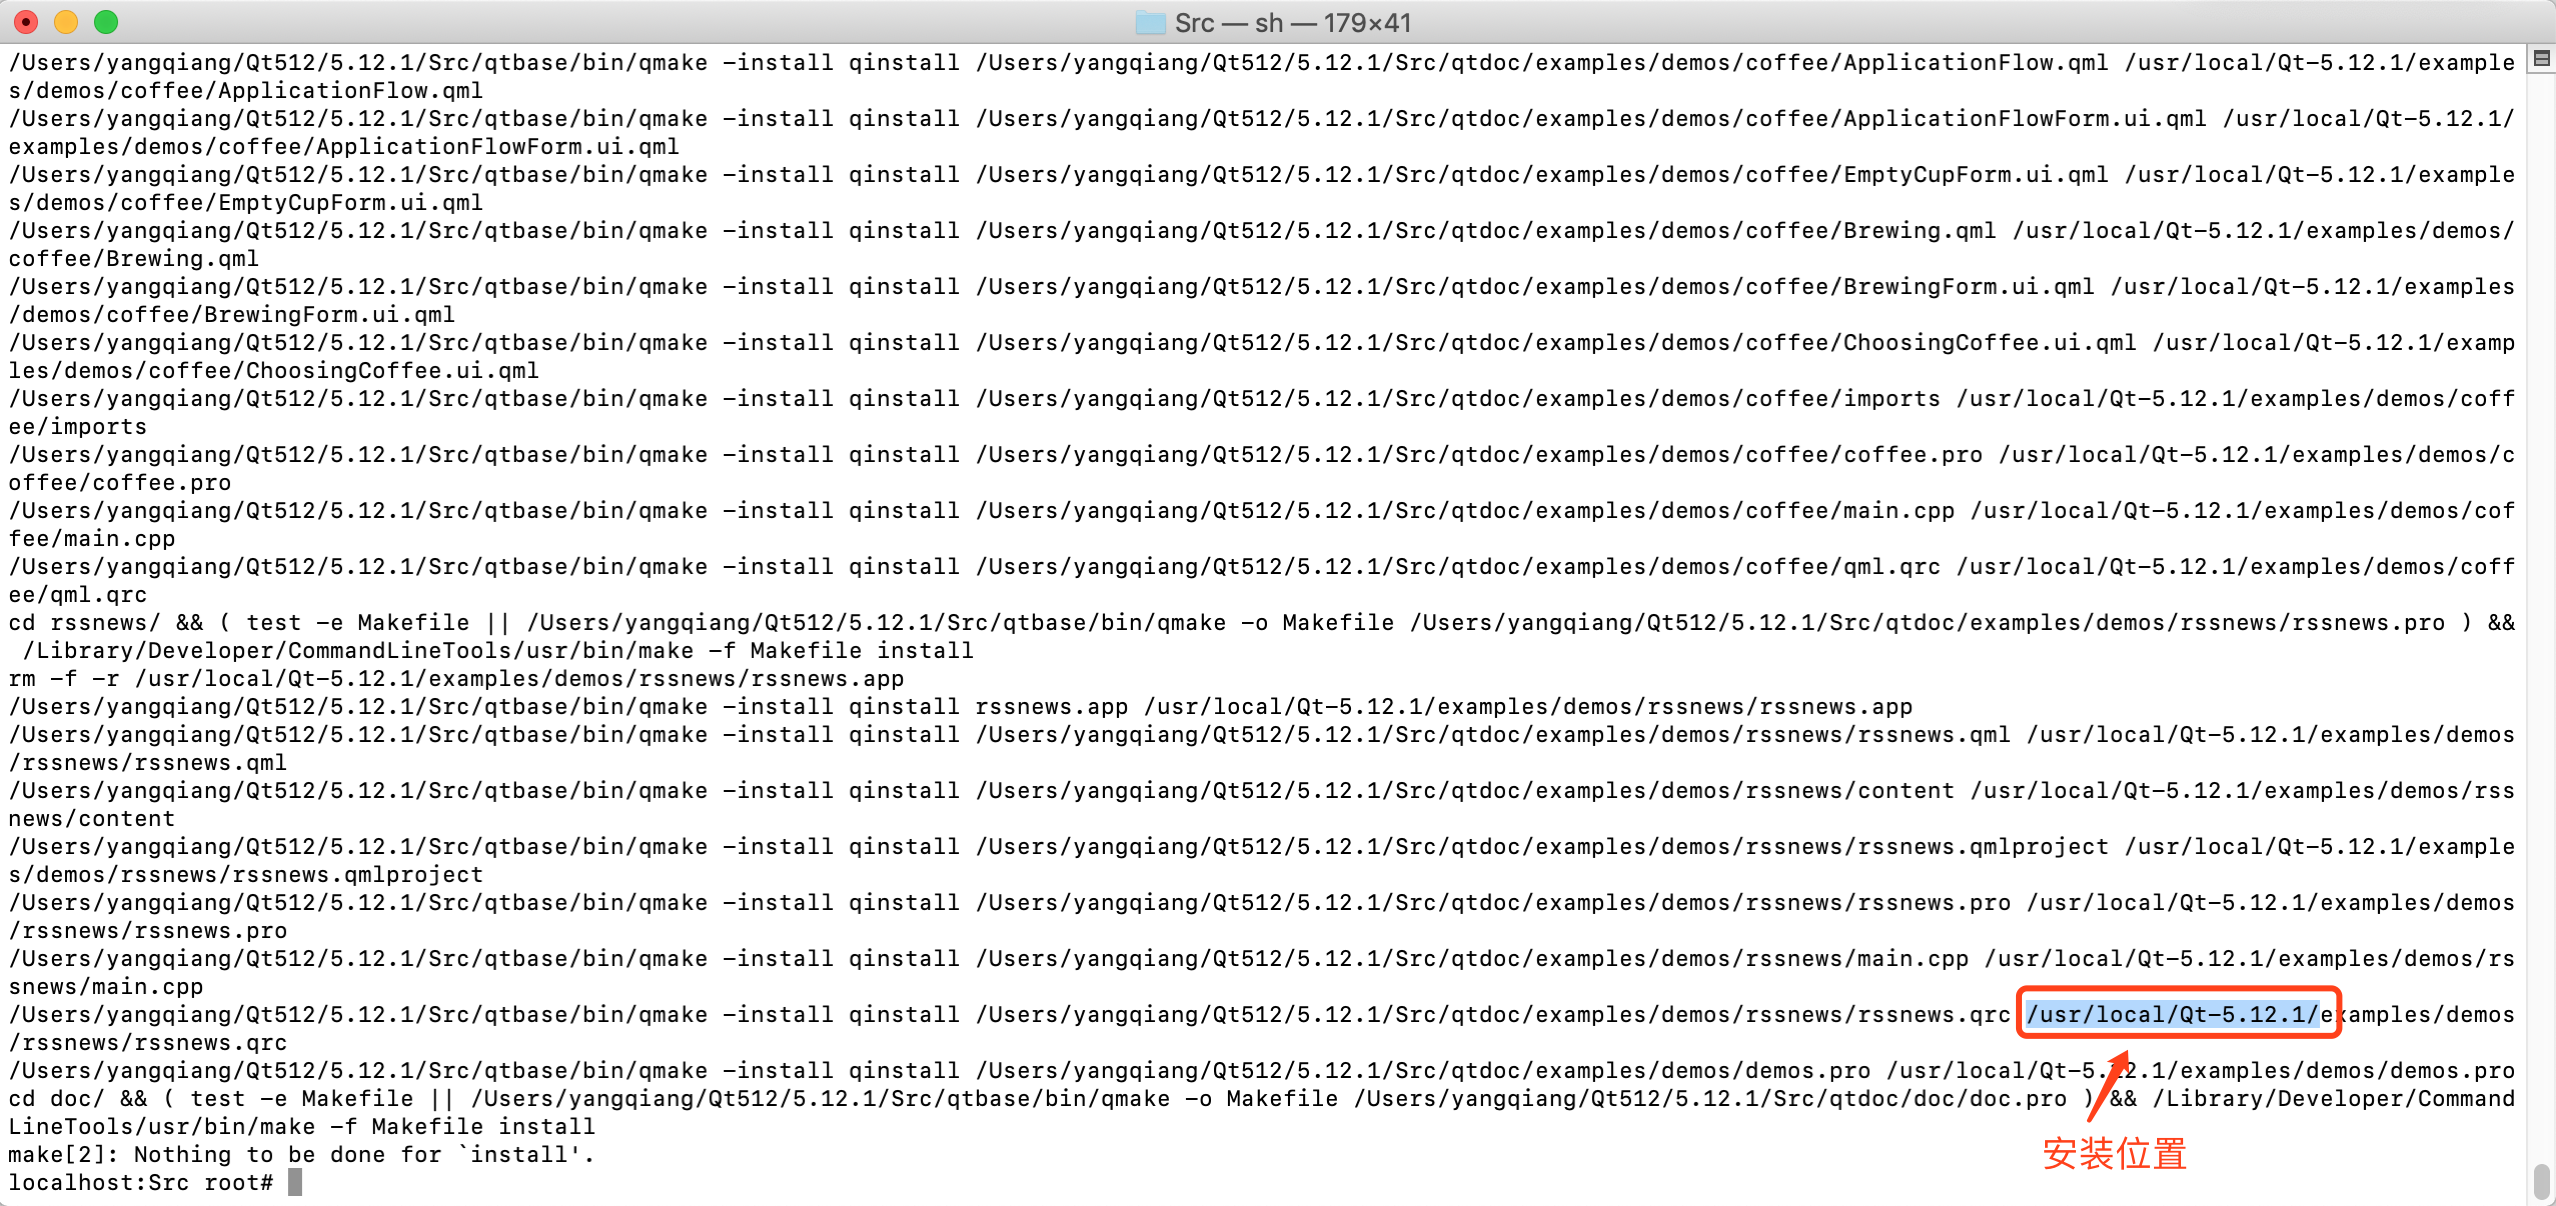

----